<a href="https://colab.research.google.com/github/ninemoonz/dacon/blob/main/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification
## Natural Language Processing
# With Convolutional Neural Network (CNN)

- 28 * 28 px images
- 10 types(classes) of clothes
- 60,000 training data
- 10,000 evaluating data


In [ ]:
# library setting
import pandas as pd
import numpy as np
import tensorflow as tf
import random

SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

#google drive folder mount
from google.colab import drive, files
drive.mount('/gdrive')

Mounted at /gdrive


## 1-1 Data Pre-processing

In [ ]:
drive_path = "/gdrive/My Drive/"
train = pd.read_csv(drive_path + "fashion/train.csv")
test = pd.read_csv(drive_path + "fashion/test.csv")
submission = pd.read_csv(drive_path + "fashion/sample_submission.csv")

print(train.shape, test.shape, submission.shape)

(60000, 786) (10000, 785) (10000, 2)


In [ ]:
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# to see train data as 28*28 px image
train_images = train.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
train_images.shape

(60000, 28, 28)

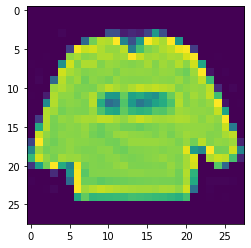

In [ ]:
# printing first image
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [ ]:
# target label
y_train = train.loc[:, 'label']
y_train.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [ ]:
# mapping the number label with actual label
target_values = {0:'T-shirt/top',
                 1:'Trouser',
                 2:'Pullover',
                 3:'Dress',
                 4:'Coat',
                 5:'Sandal',
                 6:'Shirt',
                 7:'Sneaker',
                 8:'Bag',
                 9:'Ankle boot'}

print(y_train[0])
print(target_values[y_train[0]])

2
Pullover


In [ ]:
# test data into 28*28 images
test_images = test.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
test_images.shape

(10000, 28, 28)

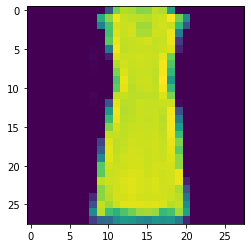

In [ ]:
# printing 500th test image
plt.imshow(test_images[499])

In [ ]:
# feature scale

# pixel has value between 0~255 so we divide the data by 255 to make the pixel scale between 0~1
x_train = train_images / 255.
x_test = test_images / 255. 

print("minimum value: ", x_train[0].min())
print("maxinum value: ", x_train[0].max())

minimum value:  0.0
maxinum value:  1.0


In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
# channel dimension expand
print("before change: ", x_train.shape, x_test.shape)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print("After change: ", x_train.shape, x_test.shape)

before change:  (60000, 28, 28) (10000, 28, 28)
After change:  (60000, 28, 28, 1) (10000, 28, 28, 1)


## 1-2 dataset separation for holdout cross validation

In [ ]:
# train - validation data split
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, shuffle=True, random_state=SEED)

print("train dataset size: ", x_tr.shape, y_tr.shape)
print("validation dataset size: ", x_val.shape, y_val.shape)

train dataset size:  (48000, 28, 28, 1) (48000,)
validation dataset size:  (12000, 28, 28, 1) (12000,)


## 1-3 MLP Model Training
- Use **Flatten layer** to process image data which has vertical and horizontal structure to make a one dimensional array.
- We are going to make 2 Dense layers
- output layer will have 10 units
- activation function : softmax
- so 784 input and 10 output


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=[28, 28]))
mlp_model.add(Dense(units=64, activation='relu'))
mlp_model.add(Dense(units=10, activation='softmax'))

mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_history = mlp_model.fit(x_tr, y_tr, batch_size=64, epochs=20, validation_data=(x_val, y_val), verbose=2)

Epoch 1/20
750/750 - 3s - loss: 0.5740 - acc: 0.8021 - val_loss: 0.4500 - val_acc: 0.8425 - 3s/epoch - 3ms/step
Epoch 2/20
750/750 - 2s - loss: 0.4221 - acc: 0.8501 - val_loss: 0.4063 - val_acc: 0.8595 - 2s/epoch - 3ms/step
Epoch 3/20
750/750 - 2s - loss: 0.3869 - acc: 0.8628 - val_loss: 0.4007 - val_acc: 0.8598 - 2s/epoch - 2ms/step
Epoch 4/20
750/750 - 2s - loss: 0.3632 - acc: 0.8702 - val_loss: 0.3955 - val_acc: 0.8579 - 2s/epoch - 2ms/step
Epoch 5/20
750/750 - 2s - loss: 0.3462 - acc: 0.8753 - val_loss: 0.3768 - val_acc: 0.8692 - 2s/epoch - 2ms/step
Epoch 6/20
750/750 - 2s - loss: 0.3294 - acc: 0.8805 - val_loss: 0.3516 - val_acc: 0.8767 - 2s/epoch - 2ms/step
Epoch 7/20
750/750 - 2s - loss: 0.3167 - acc: 0.8847 - val_loss: 0.3466 - val_acc: 0.8803 - 2s/epoch - 2ms/step
Epoch 8/20
750/750 - 2s - loss: 0.3054 - acc: 0.8890 - val_loss: 0.3535 - val_acc: 0.8727 - 2s/epoch - 2ms/step
Epoch 9/20
750/750 - 2s - loss: 0.2952 - acc: 0.8924 - val_loss: 0.3443 - val_acc: 0.8788 - 2s/epoch - 2

In [ ]:
mlp_model.layers

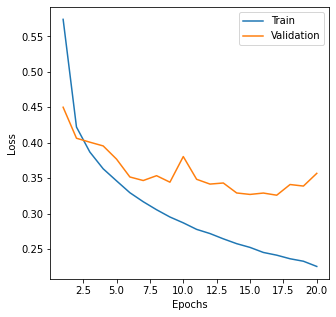

In [ ]:
# loss function graph based on history_model
def plot_loss_curve(history, total_epoch=10, start=1):
  plt.figure(figsize=(5,5))
  plt.plot(range(start, total_epoch + 1), history.history['loss'][start-1:total_epoch], label='Train')
  plt.plot(range(start, total_epoch + 1), history.history['val_loss'][start-1:total_epoch], label='Validation')

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot_loss_curve(history=mlp_history, total_epoch=20, start=1)

# shows overfitting

## 1-4 Convolutional Neural Network (CNN)

- It is an Deep Learning Algorithm which depicts the visual features of an image by applying convolution filter(or kernel)

1. Image into number data
2. Expand RGB color channel
3. Vertical pixel size, horizontal pixel size, and channel size (3rd dimensional vector)

Example on 28*28 px image:
- black/white image only has 1 channel for the color (28, 28, 1)
- color image has 3 channels to express RGB colors (28, 28, 3)

Need to know how **CNN** and **Pooling** works

### Fashion MNIST data training with CNN

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

cnn_model = Sequential()
cnn_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=[28, 28, 1]))

cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                173120    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
________________________________________________

In [ ]:
cnn_history = cnn_model.fit(x_tr, y_tr, batch_size=64, epochs=20, validation_data=(x_val, y_val), verbose=2)

Epoch 1/20
750/750 - 17s - loss: 0.4935 - acc: 0.8271 - val_loss: 0.3742 - val_acc: 0.8665 - 17s/epoch - 23ms/step
Epoch 2/20
750/750 - 15s - loss: 0.3339 - acc: 0.8815 - val_loss: 0.3107 - val_acc: 0.8916 - 15s/epoch - 20ms/step
Epoch 3/20
750/750 - 15s - loss: 0.2904 - acc: 0.8967 - val_loss: 0.3023 - val_acc: 0.8922 - 15s/epoch - 20ms/step
Epoch 4/20
750/750 - 15s - loss: 0.2624 - acc: 0.9064 - val_loss: 0.2877 - val_acc: 0.8949 - 15s/epoch - 20ms/step
Epoch 5/20
750/750 - 15s - loss: 0.2408 - acc: 0.9139 - val_loss: 0.2855 - val_acc: 0.8995 - 15s/epoch - 20ms/step
Epoch 6/20
750/750 - 15s - loss: 0.2241 - acc: 0.9203 - val_loss: 0.2744 - val_acc: 0.9027 - 15s/epoch - 19ms/step
Epoch 7/20
750/750 - 15s - loss: 0.2052 - acc: 0.9256 - val_loss: 0.2705 - val_acc: 0.9034 - 15s/epoch - 20ms/step
Epoch 8/20
750/750 - 15s - loss: 0.1893 - acc: 0.9314 - val_loss: 0.2590 - val_acc: 0.9062 - 15s/epoch - 19ms/step
Epoch 9/20
750/750 - 15s - loss: 0.1768 - acc: 0.9375 - val_loss: 0.2531 - val_a

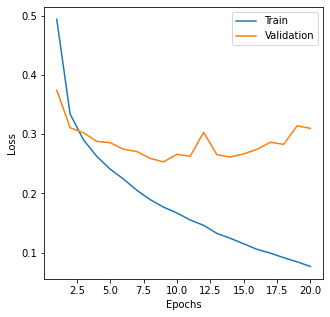

In [ ]:
plot_loss_curve(history=cnn_history, total_epoch=20, start=1)
#Overfitting

## 10-5 Prevention of Overfit with "Dropout"

In [ ]:
from tensorflow.keras.layers import Dropout
def build_cnn():
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=[28, 28, 1]))

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())

  model.add(Dense(units=64, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(units=10, activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model

cnn_model = build_cnn()
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                173120    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [ ]:
# Early Stopping Callback function
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

cnn_history = cnn_model.fit(x_tr, y_tr, batch_size=64, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=0)

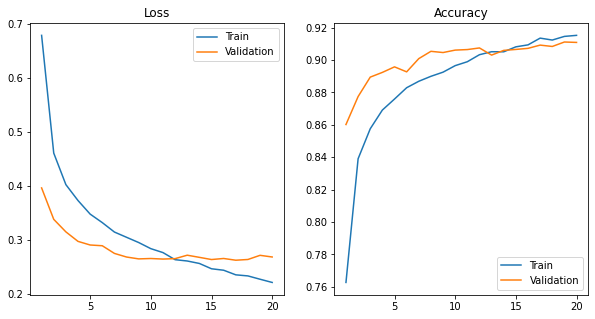

In [ ]:
# Graph to see the loss function and the accuracy until 20th epoch

start=1
end=20

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(range(start, end+1), cnn_history.history['loss'][start-1:end], label='Train')
axes[0].plot(range(start, end+1), cnn_history.history['val_loss'][start-1:end], label='Validation')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(range(start, end+1), cnn_history.history['acc'][start-1:end], label='Train')
axes[1].plot(range(start, end+1), cnn_history.history['val_acc'][start-1:end], label='Validation')
axes[1].set_title('Accuracy')
axes[1].legend()

plt.show()

In [ ]:
cnn_model.evaluate(x_val, y_val)

375/375 [==============================] - 2s 6ms/step - loss: 0.2833 - acc: 0.9104


[0.28333160281181335, 0.9104166626930237]

In [ ]:
x_val.shape
y_val.shape

(12000,)

In [ ]:
y_pred_proba = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_proba, axis=-1)
y_pred_classes[:10]

array([0, 1, 2, 6, 3, 6, 8, 6, 5, 0])

In [ ]:
y_pred_classes.shape

(10000,)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#submission

submission['label'] = y_pred_classes.astype(int)
submission_filepath = drive_path + 'mnist_cnn_submission1.csv'
submission.to_csv(submission_filepath, index=False)

## 1-6 User Config Callback Function

In [ ]:
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc') > 0.91):
      self.model.stop_training = True
      print("\n")
      print("Target Accuracy Achieved: %.4f" %logs.get('val_acc'))

my_callback = my_callback()

# Saving Best Model
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_path = drive_path + "best_conn_model.h5"
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True, save_weights_only=False)

# CNN Model Learning
cnn_model = build_cnn()
cnn_history = cnn_model.fit(x_tr, y_tr, batch_size=64, epochs=100, validation_data=(x_val, y_val),
                            callbacks=[my_callback, save_best_model],
                            verbose=2)

Epoch 1/100
750/750 - 26s - loss: 0.6749 - acc: 0.7607 - val_loss: 0.4005 - val_acc: 0.8648 - 26s/epoch - 34ms/step
Epoch 2/100
750/750 - 25s - loss: 0.4614 - acc: 0.8397 - val_loss: 0.3328 - val_acc: 0.8823 - 25s/epoch - 34ms/step
Epoch 3/100
750/750 - 26s - loss: 0.4033 - acc: 0.8584 - val_loss: 0.3115 - val_acc: 0.8879 - 26s/epoch - 35ms/step
Epoch 4/100
750/750 - 25s - loss: 0.3734 - acc: 0.8707 - val_loss: 0.3009 - val_acc: 0.8909 - 25s/epoch - 34ms/step
Epoch 5/100
750/750 - 26s - loss: 0.3502 - acc: 0.8760 - val_loss: 0.2858 - val_acc: 0.8958 - 26s/epoch - 34ms/step
Epoch 6/100
750/750 - 26s - loss: 0.3316 - acc: 0.8821 - val_loss: 0.2839 - val_acc: 0.8952 - 26s/epoch - 35ms/step
Epoch 7/100
750/750 - 15s - loss: 0.3161 - acc: 0.8882 - val_loss: 0.2791 - val_acc: 0.8992 - 15s/epoch - 21ms/step
Epoch 8/100
750/750 - 15s - loss: 0.3017 - acc: 0.8911 - val_loss: 0.2665 - val_acc: 0.9037 - 15s/epoch - 20ms/step
Epoch 9/100
750/750 - 15s - loss: 0.2921 - acc: 0.8943 - val_loss: 0.262

In [ ]:
from tensorflow.keras.models import load_model

# Loading a model saved in ModelCheckpoint
best_model = load_model(drive_path + "best_conn_model.h5")
best_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2704)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                173120    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                      

In [ ]:
y_pred_proba = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
submission['label'] = y_pred_classes
submission_filepath = drive_path + "mnist_cnn_submission2.csv"
submission.to_csv(submission_filepath, index=False)